<a href="https://colab.research.google.com/github/sriku2412/Personal-projects/blob/main/sentiment_analysis_predicting_user_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

In [131]:
# Load and preprocess data
train = pd.read_csv('/content/train.csv', encoding='latin1')
test = pd.read_csv('/content/sentiment_analysis_test.csv', encoding='latin1')

In [132]:
train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [133]:
train = train[['text', 'sentiment']].fillna('')
test = test[['text', 'sentiment']].fillna('')

In [134]:
dict = {'positive': 1, 'negative': 0}
train['sentiment'] = train['sentiment'].map(dict).fillna(2)
test['sentiment'] = test['sentiment'].map(dict).fillna(2)

In [135]:
X_train = train['text'].tolist()
X_test = test['text'].tolist()
y_train = to_categorical(train['sentiment'].tolist())
y_test = to_categorical(test['sentiment'].tolist())

In [136]:
# Tokenization
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

In [137]:
len(tokenizer.word_index)

26598

In [138]:
# Tokenization check
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Debugging: Check the first few sequences
print("First few sequences in X_train:", X_train_seq[:5])
print("First few sequences in X_test:", X_test_seq[:5])

# Data type check
print("Type of X_train_seq:", type(X_train_seq))
print("Type of X_test_seq:", type(X_test_seq))

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=35)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=35)

# Proceed with your model as usual


First few sequences in X_train: [[1, 165, 19, 10456, 73, 1, 150, 48], [423, 119, 1, 62, 94, 7, 91, 10, 1469, 2304], [5, 1367, 9, 10457, 17], [52, 1171, 353, 17, 497], [3945, 13, 117, 472, 14, 72, 331, 132, 16, 3, 7113, 50, 215, 577]]
First few sequences in X_test: [[98, 1161, 13, 3, 23, 41, 151, 63], [9, 254, 60, 905, 15345, 6211, 32, 1726, 10, 2260, 4321], [5004, 466, 106, 97, 2, 1521, 103, 852, 290, 4, 823], [53, 716], [41, 151, 63, 1, 39, 6]]
Type of X_train_seq: <class 'list'>
Type of X_test_seq: <class 'list'>


In [139]:
# Pad sequences
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=35)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=35)

In [140]:
# Model setup
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5, input_length=35))
model.add(SimpleRNN(32))
model.add(Dense(3, activation='softmax'))

In [141]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [143]:
# Model training
history = model.fit(X_train_padded, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
687/687 [==============================] - 11s 13ms/step - loss: 1.0307 - accuracy: 0.4629 - val_loss: 0.9148 - val_accuracy: 0.5776
Epoch 2/10
687/687 [==============================] - 9s 13ms/step - loss: 0.8186 - accuracy: 0.6378 - val_loss: 0.8500 - val_accuracy: 0.6238
Epoch 3/10
687/687 [==============================] - 8s 11ms/step - loss: 0.6191 - accuracy: 0.7462 - val_loss: 0.8023 - val_accuracy: 0.6527
Epoch 4/10
687/687 [==============================] - 9s 13ms/step - loss: 0.4740 - accuracy: 0.8235 - val_loss: 0.8775 - val_accuracy: 0.6313
Epoch 5/10
687/687 [==============================] - 9s 13ms/step - loss: 0.3669 - accuracy: 0.8730 - val_loss: 0.9450 - val_accuracy: 0.6302
Epoch 6/10
687/687 [==============================] - 8s 11ms/step - loss: 0.2922 - accuracy: 0.9000 - val_loss: 1.0283 - val_accuracy: 0.6336
Epoch 7/10
687/687 [==============================] - 9s 13ms/step - loss: 0.2382 - accuracy: 0.9205 - val_loss: 1.1439 - val_accuracy: 0.603

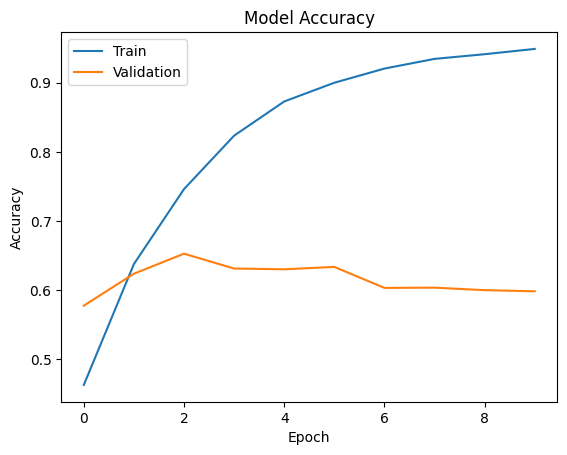

In [144]:
# Plotting
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [145]:
# Prediction function
def predict_sentiment(text):
    new_text_seq = tokenizer.texts_to_sequences([text])
    new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)
    predictions = model.predict(new_text_padded)
    predicted_class_index = predictions.argmax(axis=-1)
    sentiments = ['Positive', 'Negative', 'Neutral']
    return sentiments[predicted_class_index[0]]

In [146]:
# Predictions
print(predict_sentiment("The movie was bad, I will not recommend this to anyone"))

1/1 [==============================] - 0s 172ms/step
Neutral


In [147]:
print(predict_sentiment("The movie was good, I will recommend this to anyone"))

1/1 [==============================] - 0s 25ms/step
Negative
